# Pymaceuticals Inc.
---

### Analysis

Capomulin and Ramicane had the lowest average tumor volumes, with a mean of 40.6 (mm3) and 40.2 (mm3). The data is accurate, as Infubinol is the only treatment that had an outlier. A random mouse for Capomulin was chosen (x401), and a line plot shows the mouse's tumor size significantly decreasing over a span of 40 days. There's a correlation between the weight of the mouse and the tumor size, the heavier the mouse, the larger the tumor.
 

In [82]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_results = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merged_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [24]:
# Checking the number of mice.
total_mice = merged_results['Mouse ID'].nunique()
total_mice

249

In [64]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = merged_results.loc[merged_results.duplicated(subset=['Mouse ID', 'Timepoint']),"Mouse ID"].unique()
duplicate

array(['g989'], dtype=object)

In [65]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = merged_results.loc[merged_results["Mouse ID"] == "g989"]
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [66]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_results[merged_results['Mouse ID'].isin(duplicate)==False]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [71]:
clean_mice = clean_df["Mouse ID"].nunique()
print(clean_mice)

248


## Summary Statistics

In [74]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean=merged_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median=merged_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance=merged_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std=merged_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem=merged_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
overall_drug_volume = pd.DataFrame({"Mean Tumor Volume": mean,
                              "Median Tumor Volume": median,
                              "Tumor Volume Variance": variance,
                              "Tumor Volume Std. Dev.": std,
                              "Tumor Volume Std. Err.": sem})
overall_drug_volume

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [75]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_drug_volume = merged_results.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])
agg_drug_volume

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

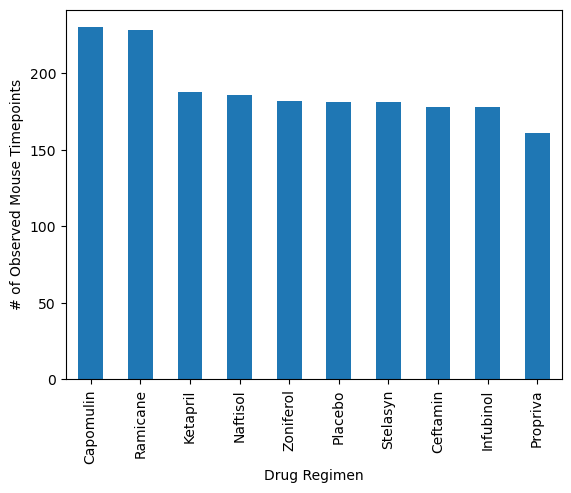

In [140]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
pandas_drugs = merged_results.groupby(["Drug Regimen"])["Timepoint"].count()
pandas_drugs.sort_values(ascending=False).plot.bar()
plt.ylabel("# of Observed Mouse Timepoints")


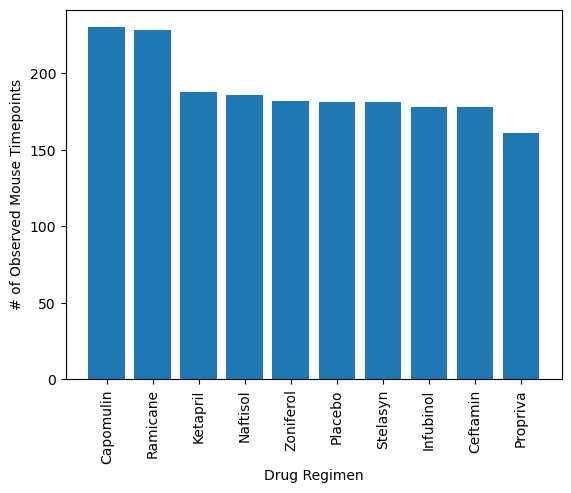

In [143]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
labels = merged_results["Drug Regimen"].value_counts()
# x = labels
# y = merged_results.groupby(["Drug Regimen"]).count()["Mouse ID"]
bar1 = plt.bar(labels.index.values, labels.values)
plt.xticks(rotation = 90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

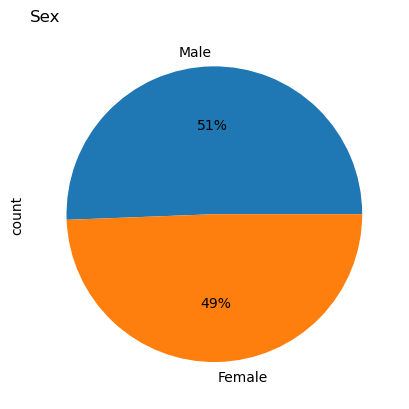

In [202]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
counts = merged_results.Sex.value_counts()
sex.plot(kind='pie', autopct="%1.0f%%")
plt.title('Sex', loc='left')
plt.show()

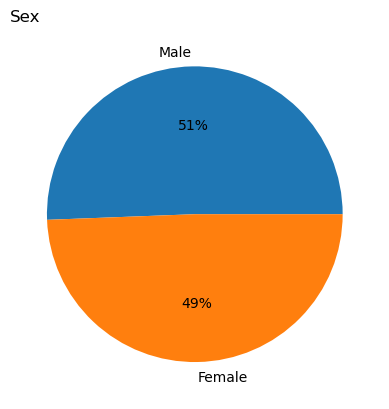

In [204]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
Gender = merged_results.Sex.value_counts()
plt.pie(Gender, labels=Gender.index.values, autopct='%1.0f%%')
plt.title('Sex', loc='left')
plt.show()

## Quartiles, Outliers and Boxplots

In [260]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = clean_df.groupby(['Mouse ID'])['Timepoint'].max()
max_df = pd.DataFrame(max_timepoint)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_merged = pd.merge(clean_df, max_df, on=['Mouse ID', "Timepoint"])
max_merged

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [261]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

all_volume_treatments = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for name in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = max_merged.loc[max_merged['Drug Regimen'] == name, 'Tumor Volume (mm3)']
    all_volume_treatments.append(tumor_volume)
    
    # add subset 
    quartiles = tumor_volume.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outliers = tumor_volume[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
    print(f"{name}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 74    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


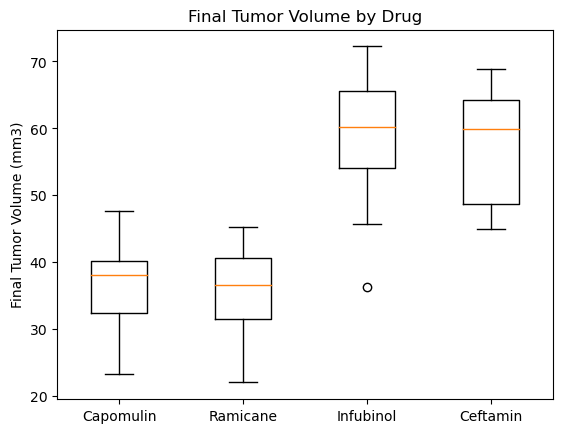

In [273]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(all_volume_treatments)
plt.title(f'Final Tumor Volume by Drug')
plt.ylabel(f'Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show()

## Line and Scatter Plots

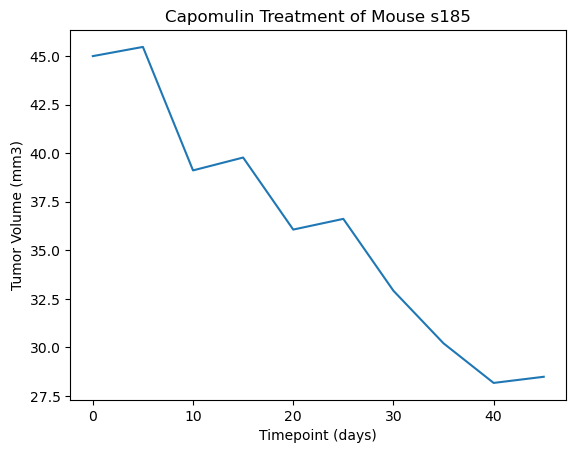

In [277]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capo_mouse = merged_results.loc[merged_results['Mouse ID'] == 'x401']

plt.plot(capo_mouse['Timepoint'], capo_mouse['Tumor Volume (mm3)'])
plt.title("Capomulin Treatment of Mouse s185")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

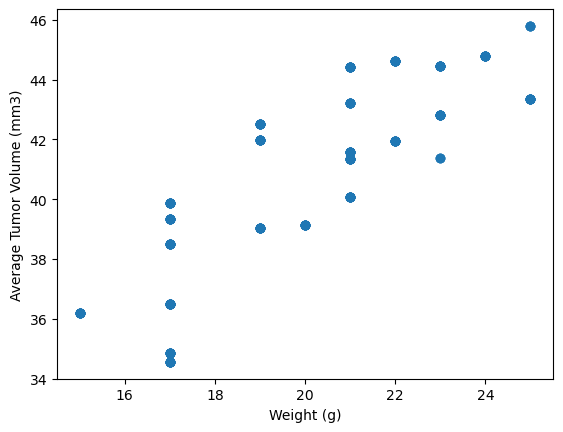

In [307]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
all_capomulin = clean_df.loc[merged_results["Drug Regimen"] == "Capomulin"]
tumor_avg = all_capomulin.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Merge both
merged_capo = pd.merge(all_capomulin, tumor_avg, on="Mouse ID")
merged_capo = merged_capo.rename(columns={"Tumor Volume (mm3)_y": "Average Tumor Volume (mm3)"})
merged_capo.head()

# Create Scatter plot
plt.scatter(merged_capo["Weight (g)"], merged_capo["Average Tumor Volume (mm3)"])
plt.xlabel ("Weight (g)")
plt.ylabel ("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.83


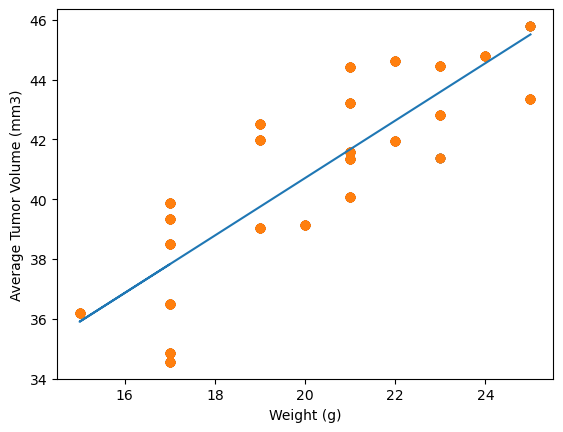

In [326]:
from scipy import stats
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Bring previous graph down
print(f"The correlation between mouse weight and the average tumor volume is {correlation:.2f}")

plt.scatter(merged_capo["Weight (g)"], merged_capo["Average Tumor Volume (mm3)"])
plt.xlabel ("Weight (g)")
plt.ylabel ("Average Tumor Volume (mm3)")

x = merged_capo["Weight (g)"]
y = merged_capo["Average Tumor Volume (mm3)"]
      
correlation = np.corrcoef(x, y)[0, 1]

slope, intercept, r, p, std_err = stats.linregress(x,y)
# def myfunc(x):
#     return slope * x + intercept

regression_values = slope * x + intercept

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()